In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats

In [2]:
other_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
df = pd.read_csv(other_path, header = None)
pd.set_option('display.max_columns', None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers

In [5]:
df.replace('?',np.NaN, inplace = True)
df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,NaN,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,NaN,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,NaN,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22,NaN


DATA PRE-PROCESSING

Missing values  
Data Formatting  
Data Normalization (centering / scaling)  
Data Binning  
Turning categorial vars into numeric


In [6]:
# Evaluating for Missing Data
# There are two methods to detect missing data:

# .isnull()
# .notnull()

missings = df.isnull()
missings

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
201,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
202,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
203,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Count missings

for column in missings.columns.values.tolist():
    print(column)
    print (missings[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [8]:
# Replace by mean:

# "normalized-losses"
# "stroke"
# "bore"
# "horsepower"
# "peak-rpm"

# Replace by frequency:

# "num-of-doors": 2 missing data, replace them with "four".
# Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur

# Drop the whole row:

# "price"
# Reason: price is what we want to predict.
#     Any data entry without price data cannot be used for prediction; 
#     therefore any row now without price data is not useful to us

In [9]:
# replace Nan in normalized-losses with a mean
mean_nl = df["normalized-losses"].astype("float").mean(axis = 0)
df['normalized-losses'].replace(np.nan, mean_nl, inplace = True)

In [10]:
mean_stroke = df['stroke'].astype('float').mean()
df['stroke'].replace(np.nan, mean_stroke, inplace = True)

In [11]:
mean_bore = df['bore'].astype('float').mean()
df['bore'].replace(np.nan, mean_bore, inplace = True)

In [12]:
mean_hrpwr = df["horsepower"].astype('float').mean()
df["horsepower"].replace(np.nan, mean_hrpwr, inplace = True)

In [13]:
mean_peak = df["peak-rpm"].astype('float').mean()
df["peak-rpm"].replace(np.nan, mean_peak, inplace = True)

In [14]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [15]:
df["num-of-doors"].replace(np.nan, "four", inplace = True)

In [16]:
#drop whole row with NaN in "price" column
df.dropna(subset = ["price"], axis = 0, inplace = True)

# reset index, because we droped two rows
df.reset_index(drop = True, inplace = True)

In [17]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
# Data Formatting

# convert 'mpg' to 'L/100km'
df['city-mpg'] = round((235 / df['city-mpg']), 2)
df.rename(columns = {'city-mpg': 'city-L/100km'}, inplace = True)

In [19]:
df["highway-mpg"] = 235 / df["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
df.rename(columns = {'highway-mpg':'highway-L/100km'}, inplace = True)

# check your transformed data 
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.19,8.703704,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,11.19,8.703704,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,12.37,9.038462,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,9.79,7.833333,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,13.06,10.681818,17450


In [20]:
# Converting dtypes
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-L/100km         float64
highway-L/100km      float64
price                 object
dtype: object

In [21]:
df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")

In [22]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-L/100km         float64
highway-L/100km      float64
price                float64
dtype: object

Data Normalization (centering / scaling)

1. Simple Feature scaling 
2. Min-Max  
3. Z-score  

In [23]:
# Normalizing horsepower

# Simple Feature scaling:
    
# df['hpwr_simple_feat'] = round(df['horsepower'] / df['horsepower'].max(), 4)

In [24]:
# Min-Max

# df['hpwr_minmax'] = round((df['horsepower'] - df['horsepower'].min()) / (df['horsepower'].max() - df['horsepower'].min()), 4)

In [25]:
# 3.Z-score

# df['hpwr_Zscore'] = round((df['horsepower'] - df['horsepower'].mean()) / df['horsepower'].std(), 4)

In [26]:
# Data Normalization

df['length'] = df['length'] / df['length'].max()
df['width'] = df['width'] / df['width'].max()
df['height'] = df['height'] / df['height'].max()

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0


Binning
* helps to improve accuracy of models

Grouping values into bins  
Convert numeric into categorial vars

In [27]:
# In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. 
# What if we only care about the price difference between cars with high horsepower, 
# medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' 
# to simplify analysis?

# We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.

Text(0.5, 1.0, 'horsepower bins')

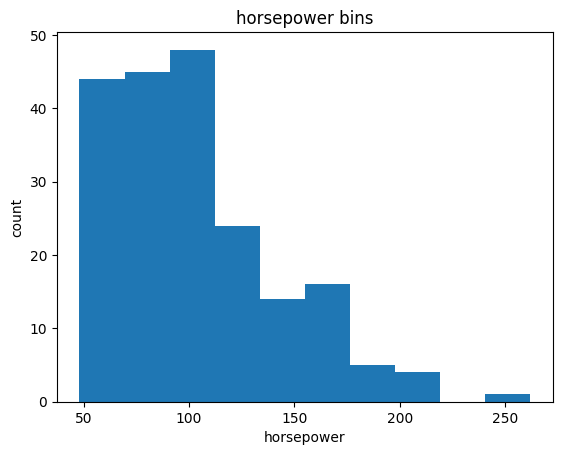

In [28]:
df["horsepower"] = df["horsepower"].astype(int, copy = True)
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [29]:
# We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above.
# The values will determine when one bin ends and another begins.

bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]), 4)

In [30]:
group_names = ['Low', 'Medium', 'High']

In [31]:
# We apply "cut" to determine what each value of df['horsepower'] belongs to.

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels = group_names, include_lowest = True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111,Low
1,111,Low
2,154,Medium
3,102,Low
4,115,Low
5,110,Low
6,110,Low
7,110,Low
8,140,Medium
9,101,Low


In [32]:
df["horsepower-binned"].value_counts()

Low       153
Medium     43
High        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

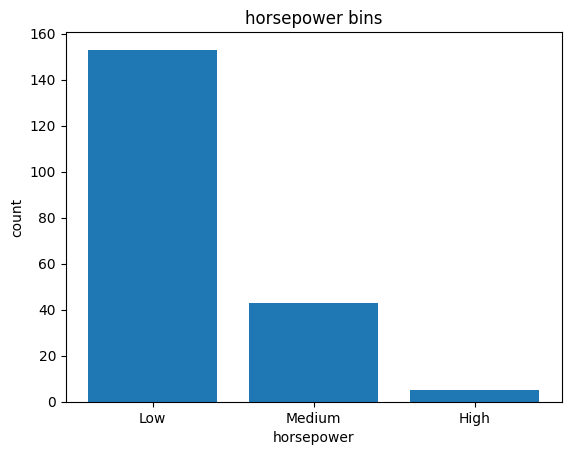

In [33]:
# Let's plot the distribution of each bin:

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

Text(0.5, 1.0, 'horsepower bins')

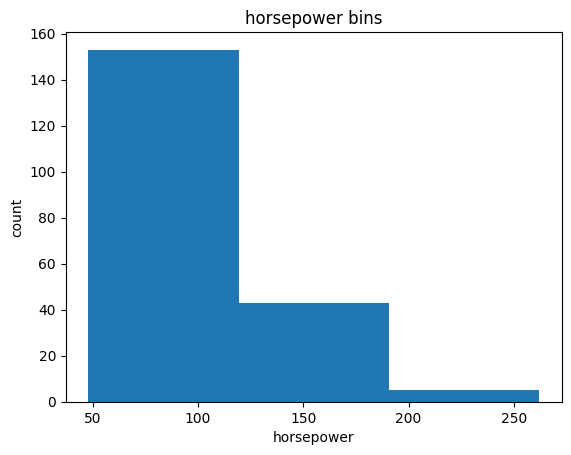

In [34]:
# Normally, a histogram is used to visualize the distribution of bins we created above.
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")
# The plot above shows the binning result for the attribute "horsepower".

Turning categorial vars into numeric

Most stat models can't use obj\strings as input - numerics only  
One-hot encoding

fuel-type    Categorial -> Numeric  
divide into 2 dummies: gas, diesel

In [35]:
dummy_variable_1 = pd.get_dummies(df['fuel-type'])

In [36]:
# Change the column names for clarity:

dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace = True)
dummy_variable_1.head()

,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [37]:
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis = 1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace = True)

In [38]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,Low,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,Low,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,Low,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,Low,0,1


In [39]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns = {'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace = True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [40]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis = 1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace = True)

In [41]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,Low,0,1,1,0


In [42]:
df.to_csv('clean_df.csv')

EXPLONATORY DATA ANALYSIS

DESCRIPTIVE STATS

df.describe()  
value_counts() - for categorial  
box plots  
scatter plot - dependency btw two vars

In [43]:
df.describe()
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


value_counts()

Value counts is a good way of understanding how many units of each characteristic/variable we have. The method "value_counts" only works on pandas series, not pandas dataframes. As a result, we only include one bracket df['drive-wheels'], not two brackets df[['drive-wheels']].

In [44]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [45]:
# We can convert the series to a dataframe as follows:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [46]:
# engine-location as variable

engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns = {'engine-location': 'value_counts'}, inplace = True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head(10)

# After examining the value counts of the engine location, we see that engine location
# would not be a good predictor variable for the price. This is because we only have 
# three cars with a rear engine and 198 with an engine in the front, so this result is skewed. 
# Thus, we are not able to draw any conclusions about the engine location.

,value_counts
engine-location,
front,198
rear,3


<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

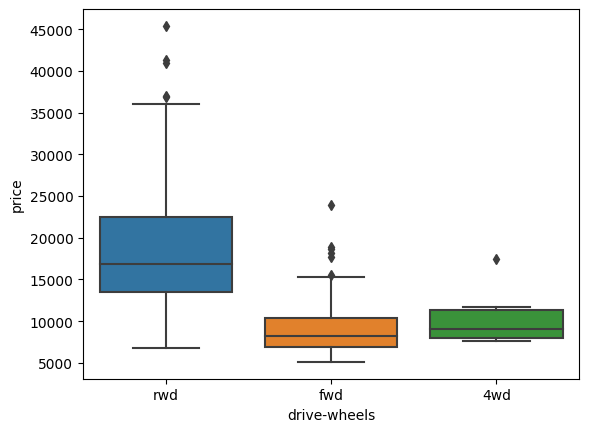

In [47]:
import seaborn as sns
sns.boxplot(x = 'drive-wheels', y = 'price', data = df)

Text(0, 0.5, 'Price')

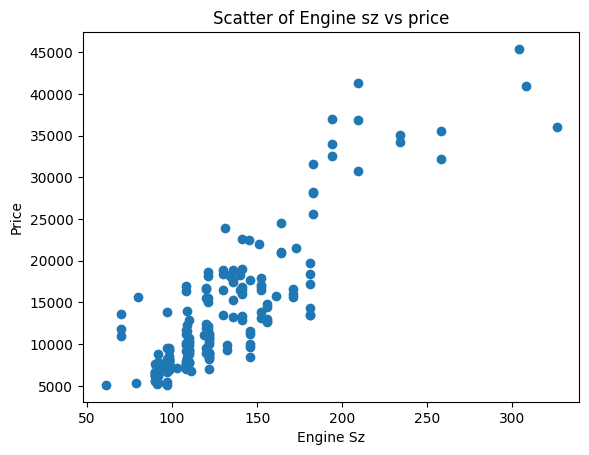

In [48]:
import matplotlib.pyplot as plt
y = df['price']
x = df['engine-size']
plt.scatter(x,y)

plt.title('Scatter of Engine sz vs price')
plt.xlabel('Engine Sz')
plt.ylabel('Price')

GROUPING DATA

1. groupby
2. pivot
3. heatmap

In [49]:
df_test = df[['drive-wheels', 'body-style', 'price']]
df_drp = df_test.groupby(['drive-wheels', 'body-style'], as_index = False).mean()
df_drp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [50]:
df_pivot = df_drp.pivot(index = 'drive-wheels', columns = 'body-style')
df_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

CORRELATION



Continuous Numerical Variables:
    
Continuous numerical variables are variables that may contain any value within some range. 
They can be of type "int64" or "float64". A great way to visualize these variables is 
by using scatterplots with fitted lines.
 
we can use "regplot" which plots the scatterplot plus the fitted regression line for the data. 
This will be useful later on for visualizing the fit of the simple linear regression model as well.

(0.0, 53745.71499587865)

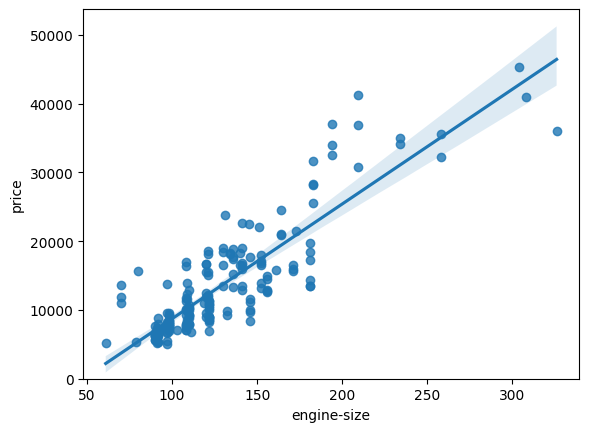

In [51]:
# Correlation btw 'price' and 'engine-size'

sns.regplot(x = 'engine-size', y = 'price', data = df)
plt.ylim(0, )

# strong positive linear correlation
# Engine size seems a good predictor since the regression line is almost a perfect diagonal line.

In [52]:
df[["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


Highway mpg is a potential predictor variable of price. 
Let's find the scatterplot of "highway-mpg" and "price".


<AxesSubplot:xlabel='highway-L/100km', ylabel='price'>

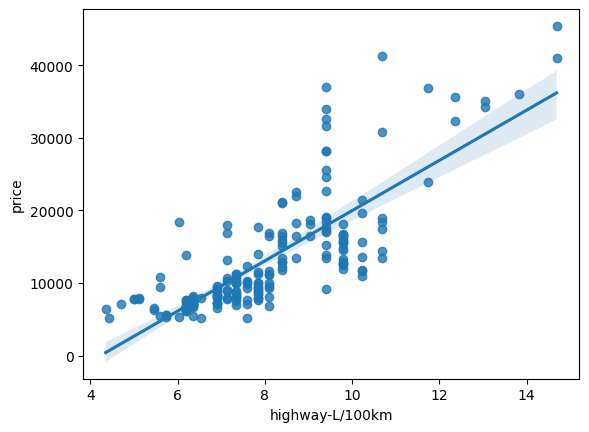

In [53]:
sns.regplot(x = "highway-L/100km", y = "price", data = df)

In [54]:
df[['highway-L/100km', 'price']].corr()
# good predictor

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


(0.0, 47414.1)

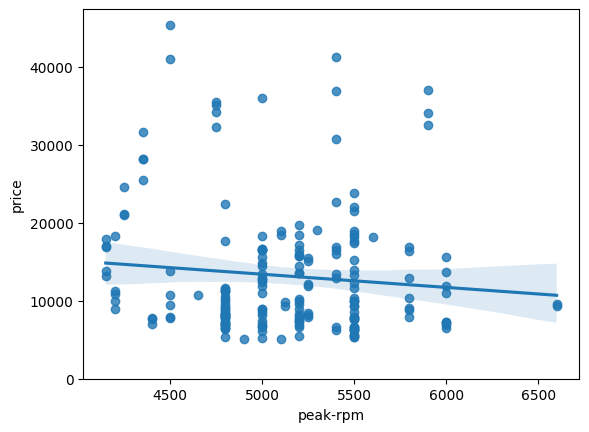

In [55]:
sns.regplot(x = 'peak-rpm', y = 'price', data = df)
plt.ylim(0, )

# bad predictor

In [56]:
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


"stroke" is a potential predictor variable of price. 
Let's find the scatterplot of "stroke" and "price".

<AxesSubplot:xlabel='stroke', ylabel='price'>

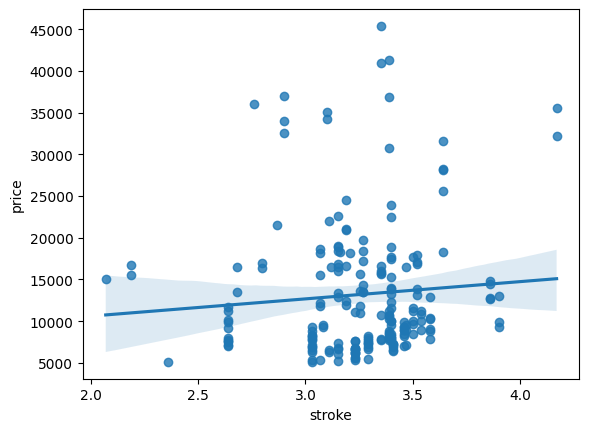

In [57]:
sns.regplot(x = "stroke", y = 'price', data = df)

In [58]:
df[["stroke", 'price']].corr()

# weak correlation

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


CATEGORIAL VARIABLES

These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". 

A good way to visualize categorical variables is by using boxplots.

<AxesSubplot:xlabel='body-style', ylabel='price'>

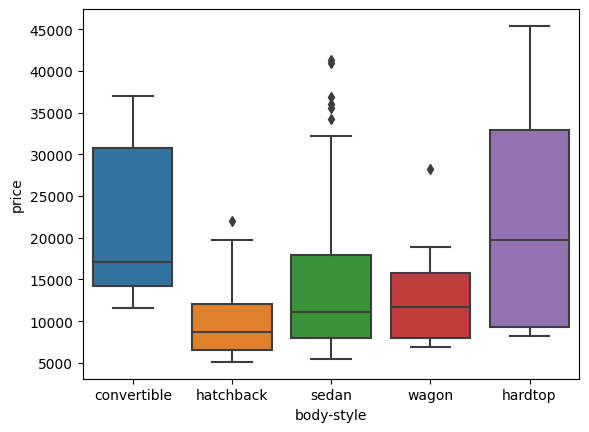

In [59]:
# relationship between "body-style" and "price"

sns.boxplot(x = "body-style", y = "price", data = df)

# We see that the distributions of price between the different body-style categories have 
# a significant overlap, so body-style would not be a good predictor of price.


<AxesSubplot:xlabel='engine-location', ylabel='price'>

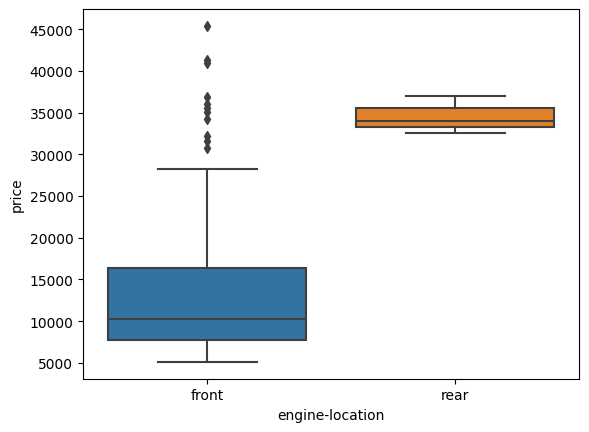

In [60]:
# Let's examine engine "engine-location" and "price":

sns.boxplot(x = "engine-location", y = "price", data = df)

# Here we see that the distribution of price between these two engine-location categories, 
# front and rear, are too distinct to take engine-location as a potential good predictor of price.

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

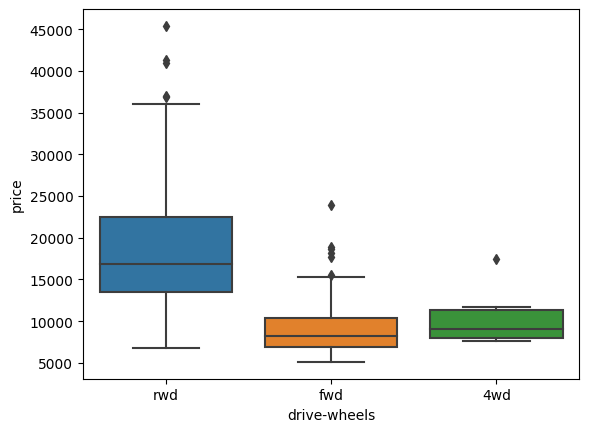

In [61]:
# Let's examine "drive-wheels" and "price".

sns.boxplot(x = "drive-wheels", y = "price", data = df)
# Here we see that the distribution of price between the different drive-wheels categories differs. 
# As such, drive-wheels could potentially be a predictor of price.

Pearson Correlation

* Correlation coefficient
     1. +1: largw positive correlation
     2. -1^ large negative correlatin
     3. 0: no relationship
* P-value
     1. P-value < 0.01 Strong certanty in the res
     2. P-value < 0.05 Moderate cert in the res
     3. P-value < 0.1 Weak cert in the res
     4. P-value > 0.1 No certanty
     
     the less, the better


In [62]:
# Pearson Correlation btw horsepower, price 

from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])

In [63]:
pearson_coef, p_value
# Since the p-value is  <  0.001, the correlation between horsepower and price is statistically significant, 
# and the linear relationship is quite strong (~0.809, close to 1).

(0.8096068016571054, 6.273536270650504e-48)

In [64]:
# Wheel-Base vs. Price
# Let's calculate the Pearson Correlation Coefficient and P-value of 'wheel-base' and 'price'.

In [65]:
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between wheel-base and price is statistically significant,
# although the linear relationship isn't extremely strong (~0.585).

(0.584641822265508, 8.076488270733218e-20)

In [66]:
# Length vs. Price
# Let's calculate the Pearson Correlation Coefficient and P-value of 'length' and 'price'.

pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between length and price 
# is statistically significant, and the linear relationship is moderately strong (~0.691).

(0.6906283804483639, 8.016477466159328e-30)

In [67]:
# Width vs. Price

pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
pearson_coef,  p_value

# Since the p-value is < 0.001, the correlation between width and price is statistically significant, 
# and the linear relationship is quite strong (~0.751).

(0.7512653440522672, 9.20033551048217e-38)

In [68]:
# Curb-Weight vs. Price

pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
pearson_coef,p_value

# Since the p-value is  <  0.001, the correlation between curb-weight and price is statistically significant,
# and the linear relationship is quite strong (~0.834).

(0.8344145257702843, 2.189577238894065e-53)

In [69]:
# Engine-Size vs. Price

pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between engine-size and price is statistically significant,
# and the linear relationship is very strong (~0.872).

(0.8723351674455182, 9.265491622200232e-64)

In [70]:
# Bore vs. Price

pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
pearson_coef, p_value

# Since the p-value is  <  0.001, the correlation between bore and price is statistically significant, 
# but the linear relationship is only moderate (~0.521).

(0.5431553832626603, 8.049189483935261e-17)

In [71]:
# city-L/100km vs. Price
pearson_coef, p_value = stats.pearsonr(df['city-L/100km'], df['price'])
pearson_coef, p_value

# Since the p-value is  > 0.001, the correlation between highway-mpg and price is statistically significant,

(0.7899173587120637, 3.8707665631722197e-44)

In [72]:
# Highway-mpg vs. Price
pearson_coef, p_value = stats.pearsonr(df['highway-L/100km'], df['price'])
pearson_coef, p_value

# Since the p-value is > 0.001, the correlation between highway-mpg and price is statistically significant,
# and the coefficient of about -0.705 shows that the relationship is negative and moderately strong.

(0.8011176263981973, 3.0467845810415427e-46)

Analysis of Variance (ANOVA)  
Дисперсионный анализ:

* finding correlation btw different groups of categorial vars
* F-tes, p-value

If our price variable is strongly correlated with the variable we are analyzing, we expect ANOVA to return a sizeable F-test score and a small p-value.

Since ANOVA analyzes the difference between different groups of the same variable, 
the groupby function will come in handy. 

To see if different types of 'drive-wheels' impact 'price', we group the data.

In [73]:
df_gptest = df[['drive-wheels','body-style','price']]

# To see if different types of 'drive-wheels' impact 'price', we group the data.

grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [74]:
# We can use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value.

f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], \
                              grouped_test2.get_group('rwd')['price'], \
                              grouped_test2.get_group('4wd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val) 


ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result with a large F-test score showing a strong correlation and a P-value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

Let's examine them separately.

In [75]:
# fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], \
                              grouped_test2.get_group('rwd')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [76]:
# 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], \
                              grouped_test2.get_group('rwd')['price'])  
   
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [77]:
# 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], \
                              grouped_test2.get_group('fwd')['price'])  
 
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


We notice that ANOVA for the categories 4wd and fwd yields a high p-value > 0.1, so the calculated F-test score is not very statistically significant. 

This suggests we can't reject the assumption that the means of these two groups are the same, or, in other words, we can't conclude the difference in correlation to be significant.

Conclusion: Important Variables  
We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

* Length
* Width
* Curb-weight
* Engine-size
* Horsepower
* City-mpg
* Highway-mpg
* Wheel-base
* Bore


Categorical variables:

* Drive-wheels


1. Linear Regression and Multiple Linear Regression

LINEAR REGRESSION

In [78]:
# loading necessary libraries

from sklearn.linear_model import LinearRegression

In [79]:
# Create the linear regression object:
lm = LinearRegression()
lm

LinearRegression()

In [80]:
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,horsepower-binned,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,Low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,0.816054,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,Low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,0.876254,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,Medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,0.908027,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,Low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,0.908027,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,Low,0,1,1,0


Using simple linear regression, we will create a linear function with "highway-L/100km" 
as the predictor variable and the "price" as the response variable.

In [81]:
X = df[['highway-L/100km']]
Y = df['price']

In [82]:
# Fit the linear model using highway-L/100km:

lm.fit(X, Y)

LinearRegression()

In [83]:
# We can output a prediction:

Yhat = lm.predict(X)
Yhat[0:13]

array([15485.52737455, 15485.52737455, 16643.34931414, 12475.19033163,
       22327.2024721 , 17893.79700889, 17893.79700889, 17893.79700889,
       26021.70702478, 13409.43286219, 13409.43286219, 14410.40700208,
       14410.40700208])

In [84]:
# intercept 
lm.intercept_

-14617.843054664598

In [85]:
# slope 
lm.coef_

array([3458.68511314])

Plugging in the actual values we get:  

Price = 38423.31 - 821.73 x highway-L/100km

MULTIPLE LINEAR REGRESSION

We've already explored that good predictors of price could be:

* Horsepower
* Curb-weight
* Engine-size
* highway-L/100km

Let's develop a model using these variables as the predictor variables.

In [86]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [87]:
lm.fit(Z, df['price'])

LinearRegression()

In [88]:
lm.intercept_

-14385.634549360093

In [89]:
lm.coef_

array([ 36.6377371 ,   3.50038215,  85.37370862, 500.51979785])

2. Model Evaluation Using Visualization

In [90]:
import seaborn as sns
%matplotlib inline 

Regression Plot

* simple linear regression: an excellent way to visualize the fit of our model is by using regplots.

(0.0, 47716.995804419945)

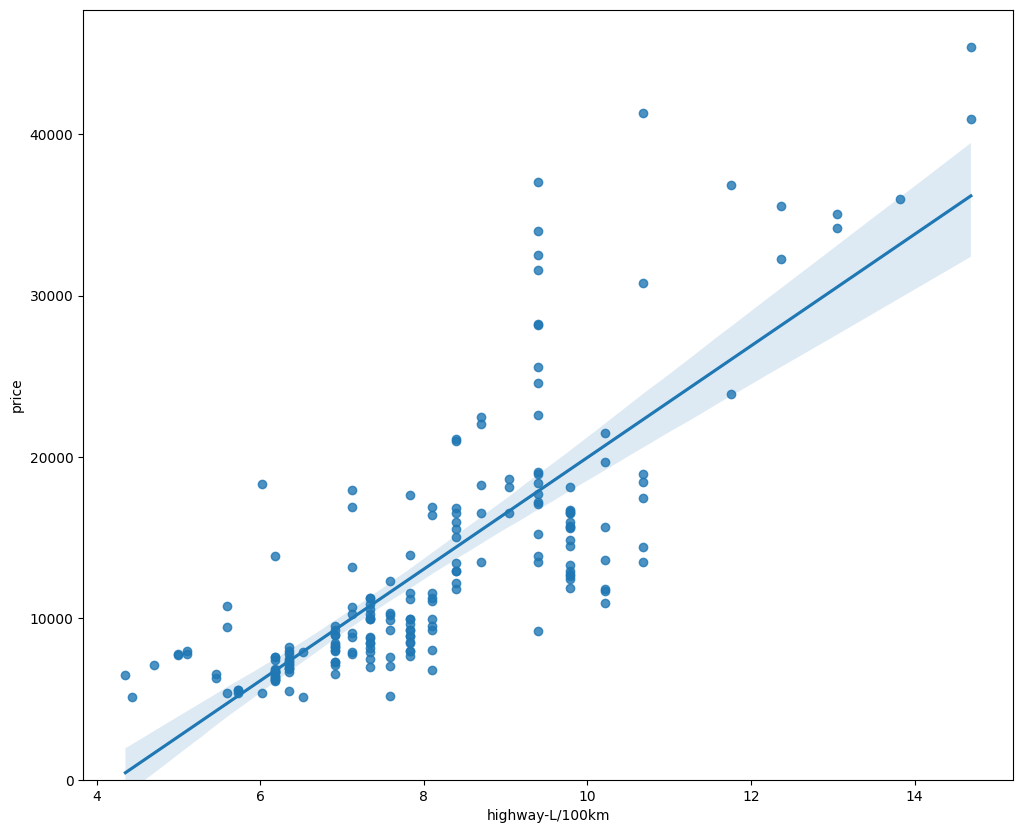

In [91]:
# highway-L/100km as potential predictor variable of price:

width = 12
height = 10
plt.figure(figsize = (width, height))
sns.regplot(x = "highway-L/100km", y = "price", data = df)
plt.ylim(0,)

In [92]:
df[['highway-L/100km', 'price']].corr()

,highway-L/100km,price
highway-L/100km,1.000000,0.801118
price,0.801118,1.000000


(0.0, 47414.1)

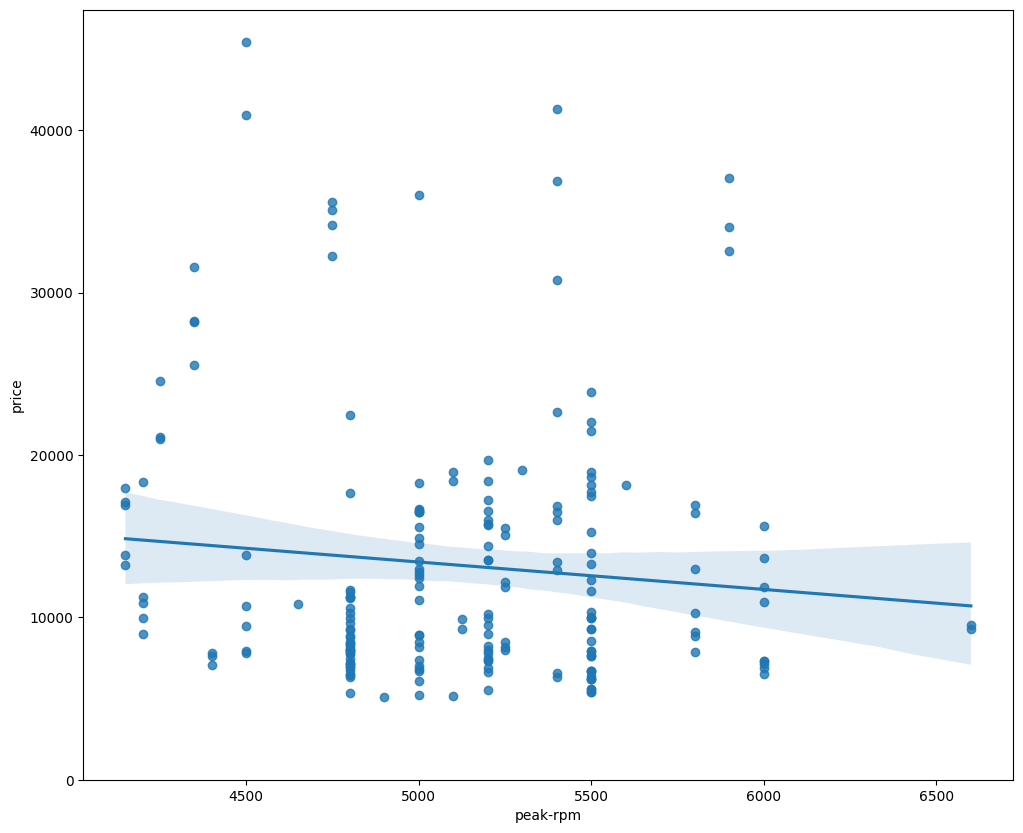

In [93]:
# for comparison: regression plot of "peak-rpm".

plt.figure(figsize = (width, height))
sns.regplot(x = "peak-rpm", y = "price", data = df)
plt.ylim(0,)

# HIGHWAAY is better predictor then peak-rmp

In [94]:
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


Residual Plot

* A good way to visualize the variance of the data is to use a residual plot.
* a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

We analyze the spread of the residuals:

If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.

Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.


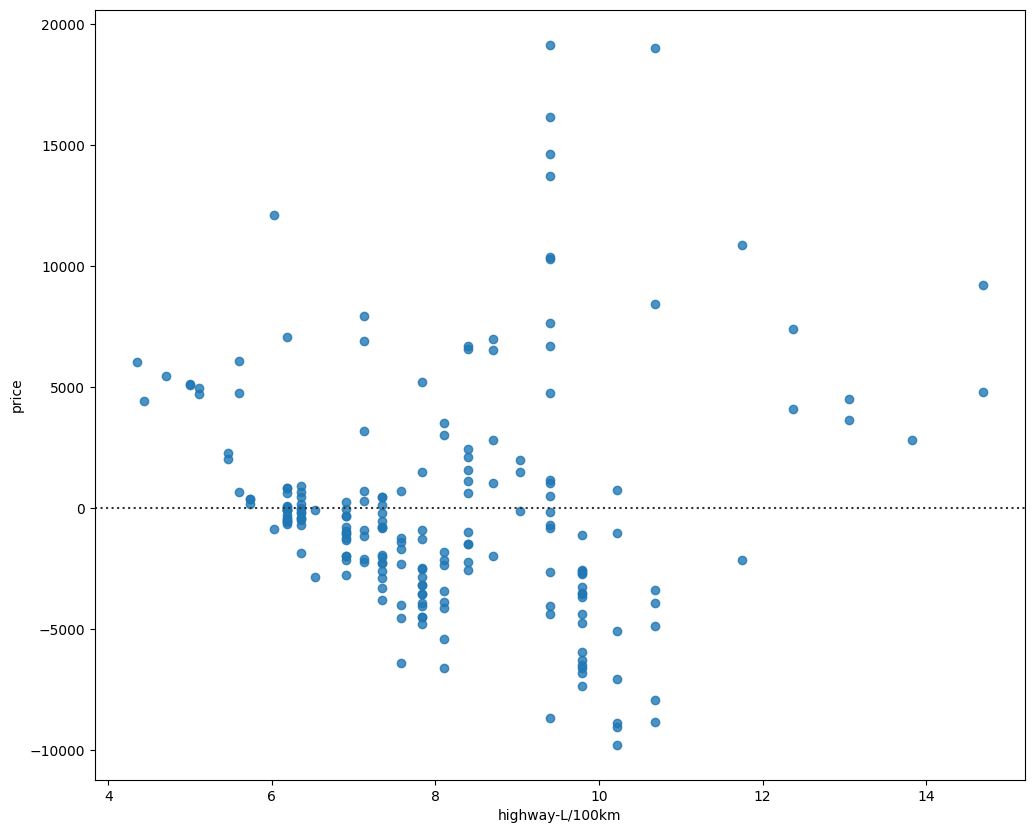

In [95]:
width = 12
height = 10
plt.figure(figsize = (width, height))
sns.residplot( x= df['highway-L/100km'], y = df['price'])
plt.show()

# residuals are not randomly spread around the x-axis
# a non-linear model may be more appropriate for this data.

POLYNOMIAL REGRESSION AND PIPELINES

* a particular case of the general linear regression model or multiple linear regression models.
* We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

We saw earlier a linear model did not provide the best fit while using "highway-mpg" as the predictor variable. 
Let's see if we can try fitting a polynomial model to the data instead.

In [96]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [97]:
# geting  variables:

x = df['highway-L/100km']
y = df['price']

In [98]:
# function polyfit - fit the polynomial using the 
# display the polynomial function - use the function poly1d to .

# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

       3         2
-23.4 x + 923.6 x - 7083 x + 2.152e+04


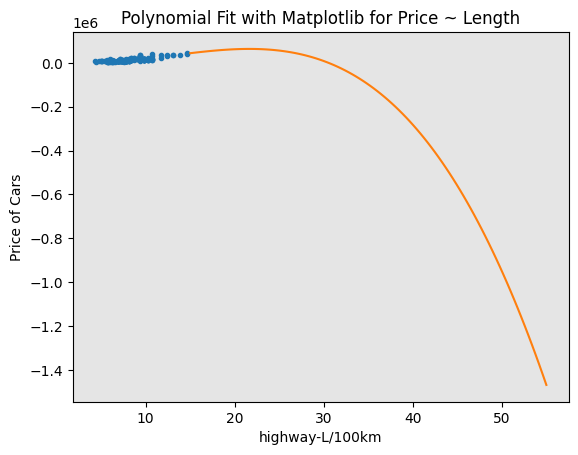

array([  -23.40461026,   923.57034965, -7083.14334079, 21515.16034362])

In [99]:
# Let's plot the function:

PlotPolly(p, x, y, 'highway-L/100km')
np.polyfit(x, y, 3)
# We can already see from plotting that this polynomial model performs better than the linear model. 
# This is because the generated polynomial function "hits" more of the data points.

Pipeline

Data Pipelines simplify the steps of processing the data. 

* the module Pipeline - to create a pipeline
* StandardScaler as a step in our pipeline.

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [101]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [102]:
# We create the pipeline by creating a list of tuples including the name of the model 
# or estimator and its corresponding constructor.

Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias = False)), \
       ('model', LinearRegression())]

In [103]:
# We input the list as an argument to the pipeline constructor:

pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [104]:
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']]

In [105]:
# First, we convert the data type Z to type float to avoid conversion warnings
# that may appear as a result of StandardScaler taking float inputs.

# Then, we can normalize the data, perform a transform and fit the model simultaneously.

Z = Z.astype(float)
pipe.fit(Z, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [106]:
# Similarly, we can normalize the data, perform a transform and produce a prediction simultaneously.

ypipe = pipe.predict(Z)
ypipe[0:4]

array([12395.58706934, 12395.58706934, 18422.45365339,  9979.7757077 ])

Measures for In-Sample Evaluation

R squared(the coefficient of determination) - a measure to indicate how close the data is to the fitted regression line.

Mean Squared Error - the average of the squares of errors. That is, the difference between actual value (y) and the estimated value (ŷ).

1 st option - Simple Linear Regression

In [107]:
#highway_fit
lm.fit(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

The R-square is:  0.6417894513258818


In [108]:
# We can predict the output i.e., "yhat" using the predict method, where X is the input variable:

Yhat = lm.predict(X)
print('The output of the first four predicted value is: ', Yhat[0:4])

The output of the first four predicted value is:  [15485.52737455 15485.52737455 16643.34931414 12475.19033163]


In [109]:
from sklearn.metrics import mean_squared_error

In [110]:
# We can compare the predicted results with the actual results:

mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  22510543.777085222


Model 2: Multiple Linear Regression

In [111]:
# fit the model 
lm.fit(Z, df['price'])

# Find the R^2
print('The R-square is: ', lm.score(Z, df['price']))

The R-square is:  0.811811561534475


In [112]:
# We produce a prediction:

Y_predict_multifit = lm.predict(Z)
# We compare the predicted results with the actual results:

print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11826072.956532085


Prediction and Decision Making

Prediction

In the previous section, we trained the model using the method fit. Now we will use the method predict to produce a prediction.

In [113]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline 

In [114]:
# Create a new input:

new_input = np.arange(1, 100, 1).reshape(-1, 1)
new_input

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71],
       [72],
       [73],
       [74],
       [75],
       [76],
       [77],

In [115]:
# Fit the model:

lm.fit(X, Y)
lm

LinearRegression()

In [116]:
# Produce a prediction:

yhat = lm.predict(new_input)
yhat[0:5]

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-11159.15794152,  -7700.47282838,  -4241.78771523,   -783.10260209,
         2675.58251105])

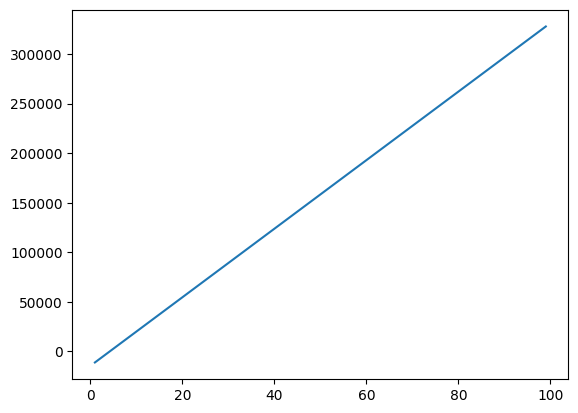

In [117]:
# Plot the data:

plt.plot(new_input, yhat)
plt.show()

Conclusion

Comparing these models, we conclude that the MLR model is better model to be able to predict price from our dataset. This result makes sense since we have 27 variables in total and we know that more than one of those variables are potential predictors of the final car price.


MODEL EVALUATION AND REFINEMENT

In [118]:
# First, let's only use numeric data:

df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,0,1,1,0


In [119]:
# Libraries for plotting:

from ipywidgets import interact, interactive, fixed, interact_manual

In [120]:
# Functions for Plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()


In [121]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax = max([xtrain.values.max(), xtest.values.max()])

    xmin = min([xtrain.values.min(), xtest.values.min()])

    x = np.arange(xmin, xmax, 0.1)

    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

TRAINING AND TESTING

Here I will split the data into training and testing data. The target data price is in a separate dataframe y_data:

In [122]:
y_data = df['price']
y_data

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [123]:
x_data = df.drop('price', axis = 1)
x_data

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,11.19,8.703704,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,11.19,8.703704,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,12.37,9.038462,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,9.79,7.833333,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,13.06,10.681818,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,0.907256,0.956944,0.928094,2952,141,3.78,3.15,9.5,114,5400.0,10.22,8.392857,0,1,1,0
197,-1,95,109.1,0.907256,0.955556,0.928094,3049,141,3.78,3.15,8.7,160,5300.0,12.37,9.400000,0,1,0,1
198,-1,95,109.1,0.907256,0.956944,0.928094,3012,173,3.58,2.87,8.8,134,5500.0,13.06,10.217391,0,1,1,0
199,-1,95,109.1,0.907256,0.956944,0.928094,3217,145,3.01,3.40,23.0,106,4800.0,9.04,8.703704,1,0,0,1


In [124]:
#  splitting tthe data into training and testing data using the function train_test_split.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.10, random_state = 1)
print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 21
number of training samples: 180


In [125]:
# creating our REgression using the feature "horsepower":

lre = LinearRegression()
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [126]:
# Let's calculate the R^2 on the test data:

lre.score(x_test[['horsepower']], y_test)

0.3635480624962413

In [127]:
# We want to compare the R^2 with the training data.

lre.score(x_train[['horsepower']], y_train)

0.662028747521533

Another option for testing is CROSS-VALIDATION

In [128]:
from sklearn.model_selection import cross_val_score

In [129]:
# We input the object, the feature ("horsepower"), and the target data (y_data). 
# The parameter 'cv' determines the number of folds. In our case, it is 4.

Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv = 4)

In [130]:
# As an output we get R^2. Each element in the array has the average R^2 value for the fold:

Rcross

array([0.77465419, 0.51718424, 0.74814454, 0.04825398])

In [131]:
# We can calculate the average and standard deviation of our estimate:

Rcross.mean(), Rcross.std()

(0.5220592359225417, 0.291304806661184)

OVERFITTING, UNDERFITTING, MODEL SELECTION

It turns out that the test data, is a much better measure of how well the model performs in the real world. One reason for this is overfitting.

In [132]:
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-L/100km,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo
0,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,11.19,8.703704,13495.0,0,1,1,0
1,3,122,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111,5000.0,11.19,8.703704,16500.0,0,1,1,0
2,1,122,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154,5000.0,12.37,9.038462,16500.0,0,1,1,0
3,2,164,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102,5500.0,9.79,7.833333,13950.0,0,1,1,0
4,2,164,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115,5500.0,13.06,10.681818,17450.0,0,1,1,0


In [133]:
# creating MLR objects, train the model using 'horsepower', 'curb-weight', 
# 'engine-size' and 'highway-mpg' as features to discover possible examples

lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']], y_train)

LinearRegression()

In [134]:
# Prediction using training data:

yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_train[0:5]

array([ 7625.80349764, 28447.913572  , 14843.22185221,  3855.72028472,
       34567.84349196])

In [135]:
# Prediction using test data:

yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-L/100km']])
yhat_test[0:5]

array([11043.92953392,  5844.12954446, 11258.50532848,  6886.86402714,
       15325.73021747])

In [136]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


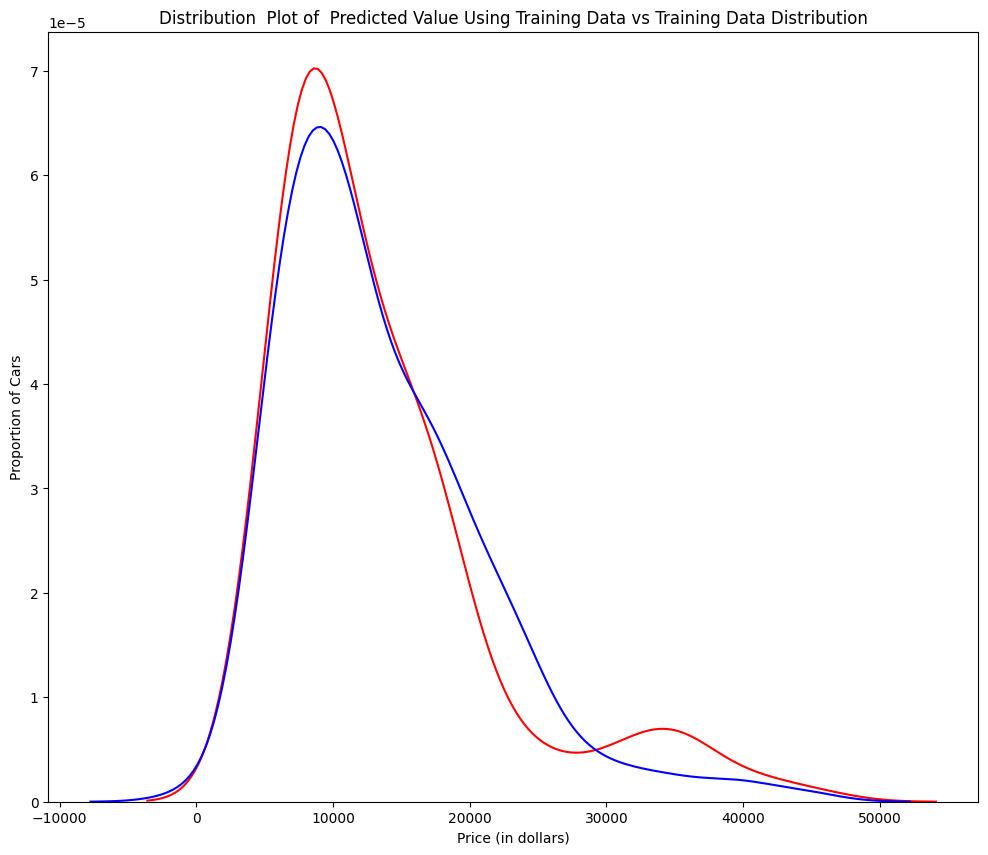

In [137]:
# the distribution of the predicted values of the training data.
# 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

Comment:
    
So far, the model seems to be doing well in learning from the training dataset. When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  import sys
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


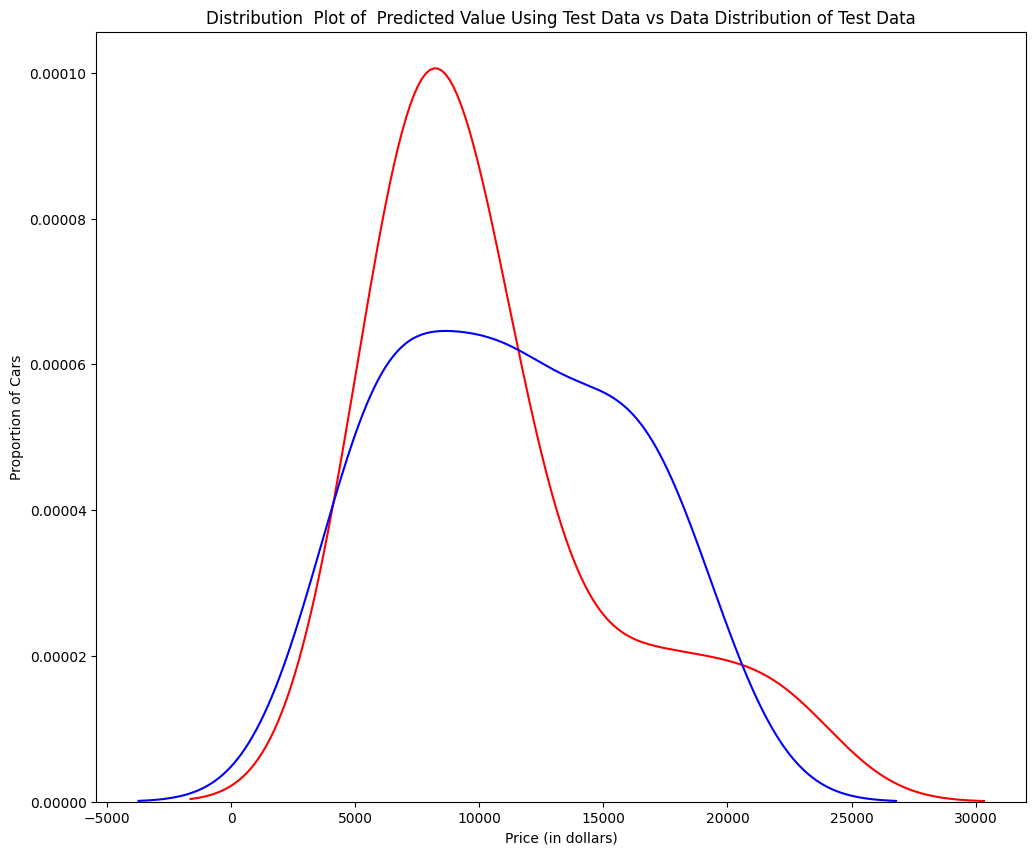

In [138]:
# the same for testing set:

Title = 'Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, "Actual Values (Test)","Predicted Values (Test)", Title)

Comment:

Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [139]:
from sklearn.preprocessing import PolynomialFeatures

In [140]:
# Overfitting

# Overfitting occurs when the model fits the noise, but not the underlying process. 
# Creation of degree 5 polynomial model.

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.45, random_state = 0)

In [162]:
# We will perform a degree 5 polynomial transformation on the feature 'horsepower'.

pr = PolynomialFeatures(degree = 5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [154]:
# Now, let's create a Linear Regression model "poly" and train it.

poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [155]:
# We can see the output of our model using the method "predict." We assign the values to "yhat".

yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6727.58267154,  7306.70989608, 12213.7082022 , 18895.03221601,
       19996.83388031])

In [156]:
#comparing the first five predicted values and actual targets.

print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6727.58267154  7306.70989608 12213.7082022  18895.03221601]
True values: [ 6295. 10698. 13860. 13499.]


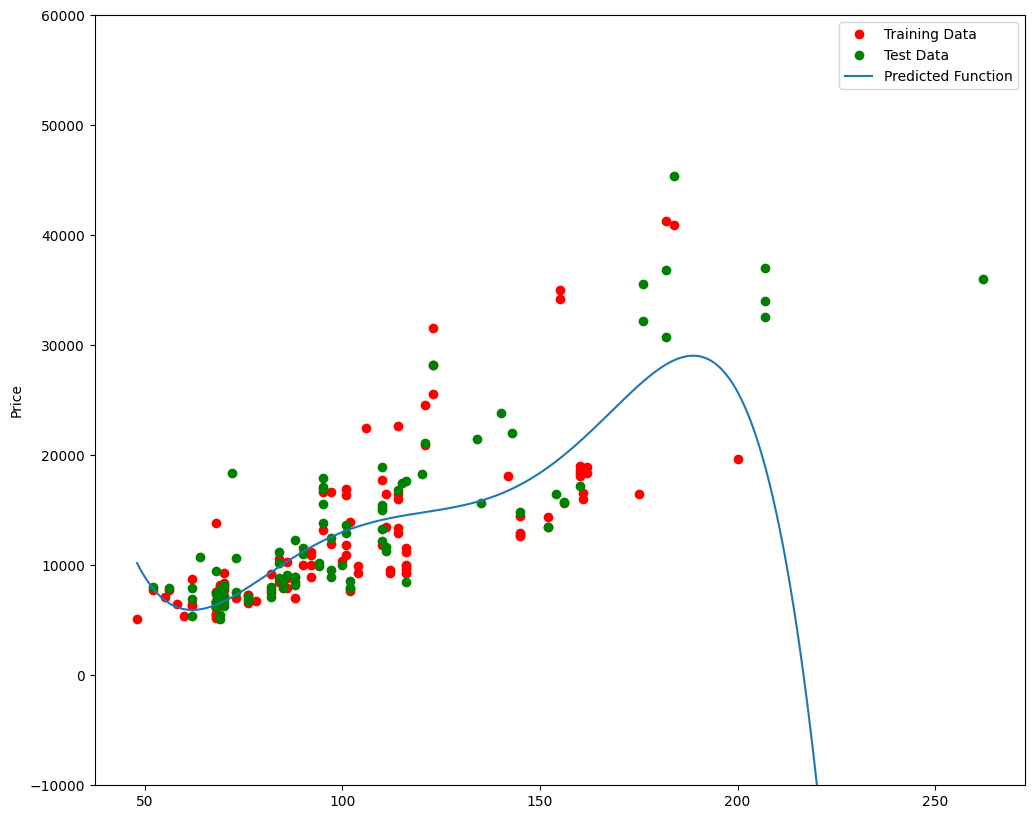

In [157]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [158]:
# R^2 of the training data:

poly.score(x_train_pr, y_train)

0.5568527853911689

In [159]:
# R^2 of the test data:

poly.score(x_test_pr, y_test)

-29.815558971873894

A negative R^2 is a sign of overfitting.

Text(3, 0.75, 'Maximum R^2 ')

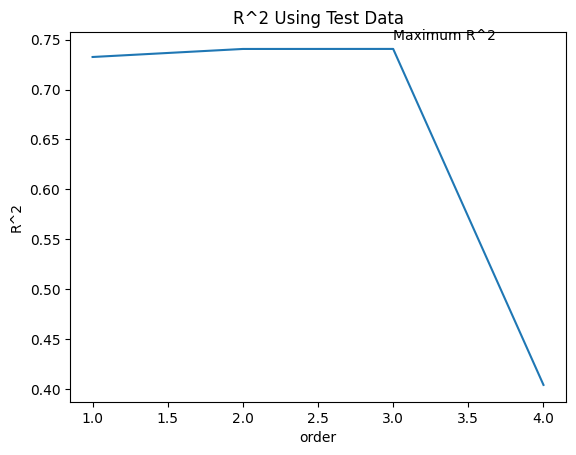

In [160]:
# Let's see how the R^2 changes on the test data for different order polynomials and  plot the results:

Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.

In [177]:
# Ok, then we will develop order three polynomial and check it

pr3 = PolynomialFeatures(degree = 3)
x_train_pr3 = pr3.fit_transform(x_train[['horsepower']])
x_test_pr3 = pr3.fit_transform(x_test[['horsepower']])
pr3

PolynomialFeatures(degree=3)

In [178]:
# Now, let's create a Linear Regression model "poly" and train it.

poly3 = LinearRegression()
poly3.fit(x_train_pr3, y_train)

LinearRegression()

In [179]:
# We can see the output of our model using the method "predict." We assign the values to "yhat".

yhat3 = poly3.predict(x_test_pr3)
yhat3[0:5]

array([ 7689.67503137,  8117.36404905, 11311.90454709, 20125.71271541,
       20776.66708622])

In [180]:
print("Predicted values:", yhat3[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 7689.67503137  8117.36404905 11311.90454709 20125.71271541]
True values: [ 6295. 10698. 13860. 13499.]


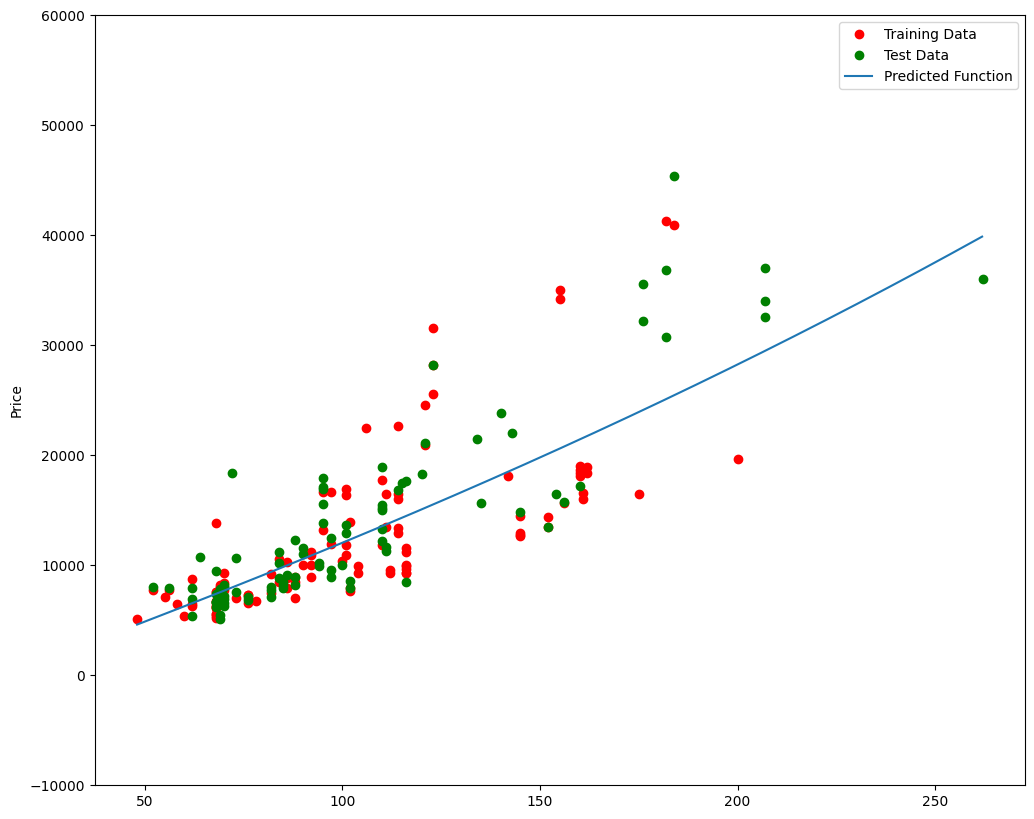

In [181]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly3, pr3)

In [182]:
# R^2 of the test data:

poly3.score(x_test_pr3, y_test)
# MUCH BETTER!

0.7406243560944837

In [ ]:
# RIDGE REGRESSION, GRID SEARCH